In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv("ex1data1.txt", names=["x", "y"])

df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [18]:
X = np.ndarray((len(df.x), 2), dtype=np.float64)
X[:, 0] = df.x
X[:, 1] = 1.0

Y = df.y

In [21]:
B = np.array([1.0, 0.0])
X @ B

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

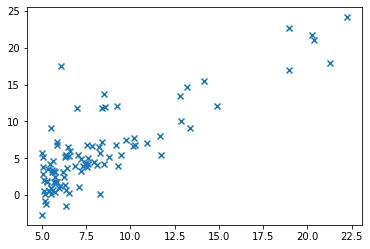

In [19]:
# plot the data
plt.scatter(X[:, 0], Y, marker="x")

In [20]:
# linear regression normal equation method
# B = (X.T @ X)^-1 @ X.T @ Y
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
beta

array([ 1.19303364, -3.89578088])

In [25]:
# define the loss function
# y = b1*x + b0

def loss(b1, b0):
    B = np.array([b1, b0])
    residual = X @ B - Y
    return np.dot(residual, residual) / (2 * len(Y))


def gradient(b1, b0):
    B = np.array([b1, b0])
    residual = X @ B - Y
    db0 = np.sum(residual) / len(Y)
    db1 = np.sum(residual * X[:, 0]) / len(Y)
    return (db1, db0)

# t = df.x * 5.0 - df.y
# np.sum(t) / len(df.x)

In [27]:
print(loss(5.0, 0.0))
print(gradient(5.0, 0.0))

722.9777704254453
(341.69086436475254, 34.95986494845361)


In [36]:
sigma = 5.0
rate = 0.001
b0 = 0.0
b1 = 5.0
step = 1
cost = loss(b1, b0)
print(b1, b0, cost)

while step < 500 and cost > sigma:
    (db1, db0) = gradient(b1, b0)
    b0 -= db0 * rate
    b1 -= db1 * rate
    cost = loss(b1, b0)
    step += 1
    print(step, b1, b0, cost)

5.0 0.0 722.9777704254453
2 4.658309135635247 -0.03495986494845361 609.8530780831211
3 4.34471852036207 -0.06709664091691525 514.5665750521202
4 4.056917647268674 -0.09664244340690237 434.30541735444547
5 3.792785987831869 -0.123810302530132 366.7003089064325
6 3.5503773711942284 -0.14879573227956597 309.755559944987
7 3.3279056478346027 -0.17177817076921068 261.7901743050526
8 3.123731532024457 -0.19292230205209587 221.3882264459003
9 2.936350526145908 -0.21237926925351056 187.3570633570319
10 2.764381837916807 -0.23028778795595603 158.69209746478128
11 2.6065582088824004 -0.24677516803748725 134.5471512269109
12 2.4617165792458704 -0.261958251490742 114.20947798821825
13 2.3287895202708886 -0.2759442731310353 97.07872171330195
14 2.2067973711435918 -0.2888316505338643 82.64919448821257
15 2.0948410223707254 -0.3007107090208415 70.4949486231858
16 1.9920952925533744 -0.31166434703461493 60.25720268522426
17 1.8978028497467507 -0.32176864680421097 51.6337502772575
18 1.81126863262817 -

In [44]:
sigma = 1.0
rate = 0.008
b0 = -0.7167
b1 = 0.8736
step = 1
cost = loss(b1, b0)
print(b1, b0, cost)

while step < 500 and cost > sigma:
    (db1, db0) = gradient(b1, b0)
    b0 -= db0 * rate
    b1 -= db1 * rate
    cost = loss(b1, b0)
    step += 1
    print(step, b1, b0, cost)

0.8736 -0.7167 5.397069886282129
2 0.8740999516496277 -0.7212805298276289 5.3944179634931615
3 0.8745733286735546 -0.7258570514604018 5.391773799439168
4 0.8750371756577221 -0.7304278622148312 5.389137269610093
5 0.8754973260676228 -0.7349923856721965 5.386508340041091
6 0.8759557768043258 -0.7395504308244205 5.383886987426751
7 0.8764132118552354 -0.7441019385459975 5.381273189765678
8 0.8768698659139647 -0.7486468948340291 5.378666925264724
9 0.8773258199201566 -0.7531853011180639 5.376068172210518
10 0.8777811021963239 -0.7577171640998243 5.3734769089542525
11 0.8782357230579436 -0.7622424922762671 5.370893113909746
12 0.8786896866573963 -0.7667612947497514 5.368316765553059
13 0.879142995037089 -0.7712735808208785 5.365747842422289
14 0.8795956495164771 -0.7757793598491695 5.363186323117386
15 0.8800476511667195 -0.7802786412054014 5.360632186299977
16 0.880499000973112 -0.7847714342553086 5.3580854106931906
17 0.880949699890675 -0.7892577483540182 5.355545975081473
18 0.8813997488

In [48]:
sigma = 1.0
rate = 0.01
b0 = -2.348
b1 = 1.037
step = 1
cost = loss(b1, b0)
print(b1, b0, cost)

while step < 500 and cost > sigma:
    (db1, db0) = gradient(b1, b0)
    b0 -= db0 * rate
    b1 -= db1 * rate
    cost = loss(b1, b0)
    step += 1
    print(step, b1, b0, cost)

1.037 -2.348 4.695094901853216
2 1.0377217143907855 -2.350745775484536 4.694297686535254
3 1.0380799745995446 -2.353522983665086 4.6935145248251695
4 1.0383732115059279 -2.356301653080345 4.692734537369368
5 1.038654475875652 -2.3590764633465384 4.69195737054917
6 1.0389331989267678 -2.361846476120111 4.691183003391846
7 1.0392110579270193 -2.364611532009472 4.690411425471484
8 1.0394883517760403 -2.367371610078642 4.689642626730618
9 1.0397651343490433 -2.3701267139906133 4.688876597158459
10 1.0400414159635865 -2.3728768517678565 4.688113326780614
11 1.0403171991929465 -2.3756220321945105 4.6873528056586204
12 1.0405924852324198 -2.3783622641768476 4.68659502388982
13 1.0408672750310177 -2.38109755662961 4.685839971607221
14 1.0411415694926447 -2.383827918455831 4.68508763897937
15 1.0414153695118606 -2.38655335854327 4.684338016210227
16 1.0416886759802422 -2.389273885763802 4.68359109353904
17 1.0419614897875145 -2.391989508973336 4.682846861240209
18 1.0422338118217556 -2.39470023